# Title: Solution for the second Assignment for ML fundemantals
# Sol.from: Ishraq Al-Dagamseh 

## Problem 1: Polynomial Regression 
---
You want to buy huge amount of chocolates to build a chocolate house, every room in this chocolate house should be made of different types of high quality chocolates. There is only one place to buy this amount of chocolate, the "Chocolate City" of 1000 different factories and famous for its cheating prices. Chocolate Merchants Association has provided a price sheet `chocolate_data.csv` to beat the deception for 10 types of quality, the prices are per kg, but there are quality types in the market that are not mentioned in the sheet. Build a **`regression model`** that predicts the price per kilogram, and says if you want 1000kg with a quality type called "3.5" what is the price?

In [1]:
#Write your code
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# lets create a random non linear dataset 
np.random.seed(123)
# import the linear regression from sklear
from sklearn.linear_model import LinearRegression
# import Polynomial features
from sklearn.preprocessing import PolynomialFeatures

In [2]:
dataset_path = 'C:/Users/admin/Downloads/logistic&Polynomial&SVR/logistic&Plynomial&SVR/chocolate_data.csv'
dataset = pd.read_csv(dataset_path)
dataset.head()

,chocolate name,quality,price
0,1,10,450
1,2,9,500
2,3,8,600
3,4,7,800
4,5,6,1100


In [3]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 2].values
X

array([[ 1, 10],
       [ 2,  9],
       [ 3,  8],
       [ 4,  7],
       [ 5,  6],
       [ 6,  5],
       [ 7,  4],
       [ 8,  3],
       [ 9,  2],
       [10,  1]], dtype=int64)

In [4]:
# create the poly feature with a degree 
poly_reg = PolynomialFeatures(degree=3)
# transform the data into that degree 
X_poly = poly_reg.fit_transform(X)
# create linear regression model
model = LinearRegression()
# Fit the model with the polynomial features
model.fit(X_poly, y)

LinearRegression()

In [5]:
# prediction 
pred = model.predict(poly_reg.fit_transform(X))


In [6]:
def show_plot(X,y):
  plt.scatter(X, y, color='red')
  plt.plot(X,pred, color='blue')
  plt.title('Polynomial Regression data')
  plt.xlabel('X points')
  plt.ylabel(' Y values')
  plt.show()

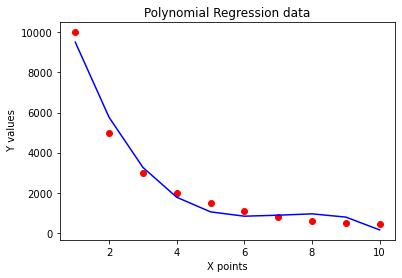

In [7]:
show_plot(X[:,1],y)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   chocolate name  10 non-null     int64
 1   quality         10 non-null     int64
 2   price           10 non-null     int64
dtypes: int64(3)
memory usage: 368.0 bytes


In [9]:
x_pred = np.array([1000,3.5])
x_pred = x_pred.reshape(-1, 2)  # preprocessing required by scikit-learn functions#(2: # of features)
#x_pred 
model.predict(poly_reg.fit_transform(x_pred))

array([1.12846477e+10])

## Problem 2: SVR
---
Build **`SVR model`** on the chocolate dataset `chocolate_data.csv` and provide the output graph showing the predictions of prices vs quality levels.

In [10]:
X

array([[ 1, 10],
       [ 2,  9],
       [ 3,  8],
       [ 4,  7],
       [ 5,  6],
       [ 6,  5],
       [ 7,  4],
       [ 8,  3],
       [ 9,  2],
       [10,  1]], dtype=int64)

In [11]:
y

array([  450,   500,   600,   800,  1100,  1500,  2000,  3000,  5000,
       10000], dtype=int64)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
sc_Y=StandardScaler()
X=sc_X.fit_transform(X) 
#y=sc_Y.fit_transform(y)

In [12]:
#Write your code
# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor=SVR(kernel='rbf', degree=10)
regressor.fit(X,y)

SVR(degree=10)

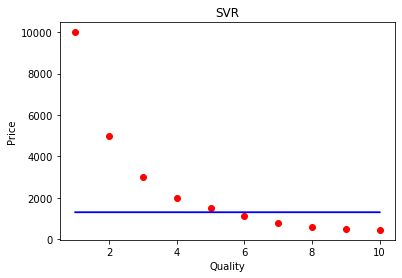

In [13]:
# Visualising the SVR results
plt.scatter(X[:,1], y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('SVR')
plt.xlabel('Quality')
plt.ylabel('Price')
plt.show()

# I Think in the previous chart show that thier is an Underfit 

## Problem 3:  Logistic Regression
---

- Mention 2 types of regularization used to overcome the overfitting problem and what is the difference between them.

- Using the data below in X,y. Build a **`logistic model`** to predict the output and evaluate the model with a confusion matrix.

# In the next img we display image that summarized the main Regularization Techniques in ML, like:
1. Modify the loss function
2.L2 which prevent weight from going to high values 

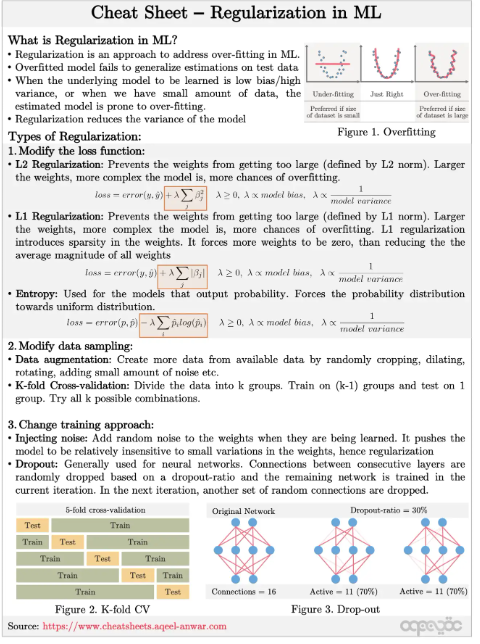

In [14]:
#Write your code
X2 = np.arange(15).reshape(-1, 1)
y2 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [15]:
X2

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14]])

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X2, y2, test_size=0.15, random_state=0)

In [17]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()

In [18]:
logisticRegr.fit(x_train, y_train)

LogisticRegression()

In [19]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(x_test[0].reshape(1,-1))

array([0])

In [20]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

1.0


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [22]:
# Compute results using CM and print it 
predictions = logisticRegr.predict(x_test)

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[2 0]
 [0 1]]


<AxesSubplot:>

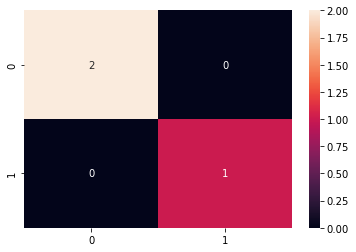

In [23]:
# plot CM
import seaborn as sns
sns.heatmap(cm, annot=True)

In [24]:
# classification Report
from sklearn.metrics import classification_report
# compute the classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



# Good Luck 🤗 🤗 🤗